In [3]:
#Data processing for mnist

import tensorflow as tf
import numpy as np

image_height = 28
image_width = 28
 
color_channels = 1
 
model_name = "mnist"
 
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
 
train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
 
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
 
category_names = list(map(str, range(10)))
 
# TODO: Process mnist data
print(train_data.shape)
 
train_data = np.reshape(train_data, (-1, image_height, image_width, color_channels))
 
print(train_data.shape)
 
eval_data = np.reshape(eval_data, (-1, image_height, image_width, color_channels))

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 28, 28, 1)


In [1]:
import matplotlib.pyplot as plt

#Data processing for cifar-10

image_height = 32
image_width = 32
 
color_channels = 3
 
model_name = "cifar"
 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
 
cifar_path = './cifar-10-data/'
 
train_data = np.array([])
train_labels = np.array([])
 
# Load all the data batches.
for i in range(1,6):
    data_batch = unpickle(cifar_path + 'data_batch_' + str(i))
    train_data = np.append(train_data, data_batch[b'data'])
    train_labels = np.append(train_labels, data_batch[b'labels'])
 
 
# Load the eval batch.
eval_batch = unpickle(cifar_path + 'test_batch')
 
eval_data = eval_batch[b'data']
eval_labels = eval_batch[b'labels'] 
 
# Load the english category names.
category_names_bytes = unpickle(cifar_path + 'batches.meta')[b'label_names']
category_names = list(map(lambda x: x.decode("utf-8"), category_names_bytes))
 
# TODO: Process Cifar data
 
def process_data(data):
    float_data = np.array(data, dtype=float) / 255.0
    
    reshaped_data = np.reshape(float_data, (-1, color_channels, image_height, image_width))
     
    transposed_data = np.transpose(reshaped_data, [0, 2, 3, 1])
    plt.imshow(transposed_data[0])
     
    reshaped_data = np.reshape(float_data, (-1, image_height, image_width, color_channels))
    plt.imshow(reshaped_data[0])
    
    return transposed_data
 
 
train_data = process_data(train_data)
 
eval_data = process_data(eval_data)

NameError: name 'np' is not defined

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 28, 28, 1)
(?, 32, 32, 3)
(?, 32, 32, 32)
(?, 16, 16, 32)
(?, 32, 32, 54)
(?, 16, 16, 32)
(?, 1024)
(?, 1024)
(?, 10)


KeyboardInterrupt: 

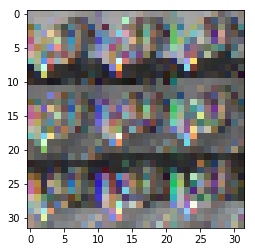

In [6]:
#Data processing for mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

image_height = 28
image_width = 28
 
color_channels = 1
 
model_name = "mnist"
 
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
 
train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
 
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
 
category_names = list(map(str, range(10)))
 
# TODO: Process mnist data
print(train_data.shape)
 
train_data = np.reshape(train_data, (-1, image_height, image_width, color_channels))
 
print(train_data.shape)
 
eval_data = np.reshape(eval_data, (-1, image_height, image_width, color_channels))

#Data processing for cifar-10

image_height = 32
image_width = 32
 
color_channels = 3
 
model_name = "cifar"
 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
 
cifar_path = './cifar-10-data/'
 
train_data = np.array([])
train_labels = np.array([])
 
# Load all the data batches.
for i in range(1,6):
    data_batch = unpickle(cifar_path + 'data_batch_' + str(i))
    train_data = np.append(train_data, data_batch[b'data'])
    train_labels = np.append(train_labels, data_batch[b'labels'])
 

# Load the eval batch.
eval_batch = unpickle(cifar_path + 'test_batch')
 
eval_data = eval_batch[b'data']
eval_labels = eval_batch[b'labels'] 
 
# Load the english category names.
category_names_bytes = unpickle(cifar_path + 'batches.meta')[b'label_names']
category_names = list(map(lambda x: x.decode("utf-8"), category_names_bytes))
 
# TODO: Process Cifar data
 
def process_data(data):
    float_data = np.array(data, dtype=float) / 255.0
    
    reshaped_data = np.reshape(float_data, (-1, color_channels, image_height, image_width))
     
    transposed_data = np.transpose(reshaped_data, [0, 2, 3, 1])
    plt.imshow(transposed_data[0])
     
    reshaped_data = np.reshape(float_data, (-1, image_height, image_width, color_channels))
    plt.imshow(reshaped_data[0])
    
    return transposed_data

train_data = process_data(train_data) 
eval_data = process_data(eval_data)


class ConvNet:
     
    def __init__(self, image_height, image_width, channels, num_classes):
         
        self.input_layer = tf.placeholder(dtype=tf.float32, shape=[None, image_height, image_width, channels], name="inputs")
        print(self.input_layer.shape)
        
        conv_layer_1 = tf.layers.conv2d(self.input_layer, filters = 32, kernel_size=[5,5], padding="same", activation=tf.nn.relu)
        print(conv_layer_1.shape)
         
        pooling_layer_1 = tf.layers.max_pooling2d(conv_layer_1, pool_size=[2,2], strides=2)
        print(pooling_layer_1.shape)
        
        conv_layer_2 = tf.layers.conv2d(self.input_layer, filters = 54, kernel_size=[5,5], padding="same", activation=tf.nn.relu)
        print(conv_layer_2.shape)
        
        pooling_layer_2 = tf.layers.max_pooling2d(conv_layer_2, pool_size=[2,2], strides=2)
        print(pooling_layer_1.shape)
        
        flattened_pooling = tf.layers.flatten(pooling_layer_2)
        dense_layer = tf.layers.dense(flattened_pooling, 1024, activation=tf.nn.relu)
        print(dense_layer.shape)
        
        dropout = tf.layers.dropout(dense_layer, rate=0.4, training=True)
        print(dense_layer.shape)
        
        outputs = tf.layers.dense(dropout, num_classes)
        print(outputs.shape)
        
        self.choice = tf.argmax(outputs, axis=1)
        self.probability = tf.nn.softmax(outputs)
        
        self.labels = tf.placeholder(dtype=tf.float32, name="labels")
        self.accuracy, self.accuracy_op = tf.metrics.accuracy(self.labels, self.choice)
         
        one_hot_labels = tf.one_hot(indices=tf.cast(self.labels, dtype=tf.int32), depth=num_classes)     
        self.loss = tf.losses.softmax_cross_entropy(onehot_labels=one_hot_labels, logits=outputs)
         
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
        self.train_operation = optimizer.minimize(loss=self.loss, global_step=tf.train.get_global_step())
        
training_steps = 20000
batch_size = 64
 
path = "./" + model_name + "-cnn/"
 
load_checkpoint = False

# TODO: implement the training loop
tf.reset_default_graph()
 
dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
dataset = dataset.shuffle(buffer_size=train_labels.shape[0])
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()
 
dataset_iterator = dataset.make_initializable_iterator()
next_element = dataset_iterator.get_next()
 
cnn = ConvNet(image_height,image_width,color_channels,10)
 
saver = tf.train.Saver(max_to_keep=2)
 
if not os.path.exists(path):
    os.makedirs(path)
     
with tf.Session() as sess:
     
    if load_checkpoint:
        checkpoint = tf.train.get_checkpoint_state(path)
        saver.restore(sess, checkpoint.model_checkpoint_path)
    else:
        sess.run(tf.global_variables_initializer())
     
    sess.run(tf.local_variables_initializer())
    sess.run(dataset_iterator.initializer)
    for step in range(training_steps):
        current_batch = sess.run(next_element)
         
        batch_inputs = current_batch[0]
        batch_labels = current_batch[1]
         
        sess.run((cnn.train_operation, cnn.accuracy_op), feed_dict={ cnn.input_layer:batch_inputs, cnn.labels:batch_labels})
        
        if step % 1000 == 0 and step > 0:
            current_acc = sess.run(cnn.accuracy)
             
            print("Accuracy at step " + str(step) + ": " + str(current_acc))
            print("Saving checkpoint")
            saver.save(sess, path + model_name, step)
         
    print("Saving final checkpoint for training session.")
    saver.save(sess, path + model_name, step)